In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.phonon import bandstructure
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.ext.matproj import MPRester
with MPRester("hGWi2mG3AMC2JfpV0r") as m:

    # Structure de bande de phonons du matériau attribué
    ph_bandstructure = m.get_phonon_bandstructure_by_material_id("mp-36111")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



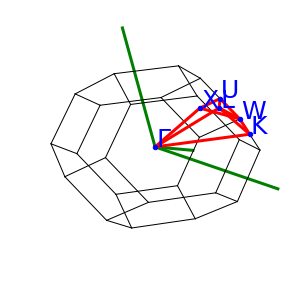

In [3]:
plotter = PhononBSPlotter(ph_bandstructure)
plotter.plot_brillouin() 
plt.show()

# Vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

La vitesse du son se calcule simplement en faisant la valeur absolue de la dérive de ω par rapport au vecteur d'onde q $v =$ |$\frac{dω}{dq}$| sahant que $ω =2\pi f$

Il faut aussi faire attention aux unités car notre graphie est en THz $10^{12} Hz$ alors que les disatnces, elles sont en angström ($10^{-10} m $)

## Direction Γ - X

La vitesse du son dans la direction Γ - X vaut 4642.657499646042 m/s.


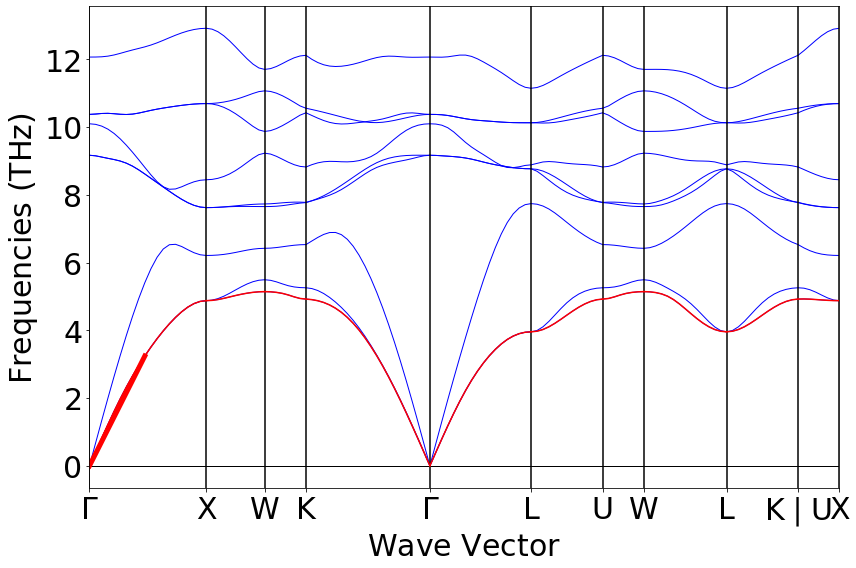

In [4]:
plotter = PhononBSPlotter(ph_bandstructure)
data = plotter.bs_plot_data() 
dist = data.get("distances")
freq = data.get("frequency")
plotter.get_plot()

for i in range(len(dist)):
    
    plt.plot(dist[i], freq[i][0], color = 'red')
    


plt.plot([dist[0][0],dist[0][9]],[freq[0][0][0],freq[0][0][9]], color='red', lw=5)


a = 2*np.pi*np.abs((freq[0][0][1]-freq[0][0][0])*(10**2))/(dist[0][1]-dist[0][0])
print("La vitesse du son dans la direction Γ - X vaut "+str(a) +" m/s.")




## Direction K - Γ

La vitesse du son dans la direction K - Γ vaut 4750.364977987459 m/s.


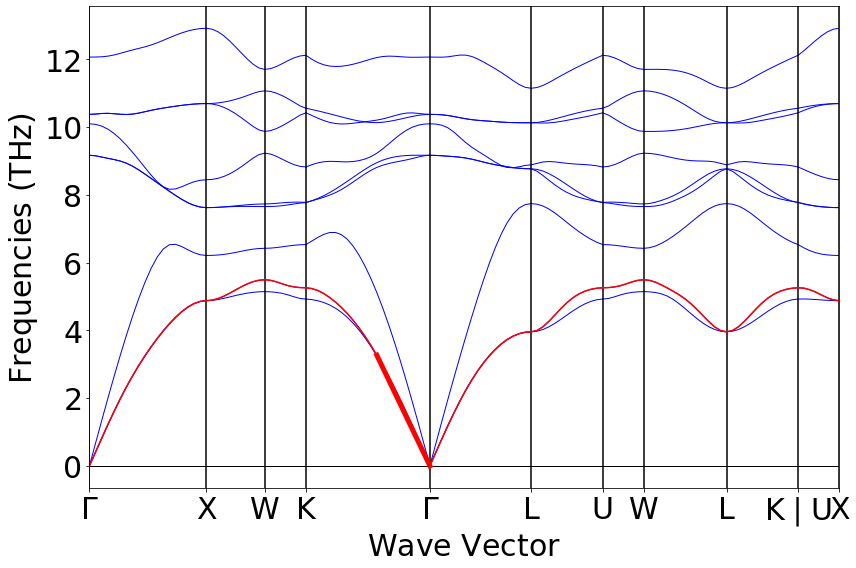

In [5]:
plotter.get_plot()
for i in range(len(dist)):
    
    plt.plot(dist[i], freq[i][1], color = 'red')
    



plt.plot([dist[3][12],dist[3][-1]],[freq[3][1][12],freq[3][1][-1]], color='red', lw=5)


a = 2*np.pi*np.abs((freq[3][1][-1]-freq[3][1][-2])*(10**2))/(dist[3][-1]-dist[3][-2])
print("La vitesse du son dans la direction K - Γ vaut "+str(a) +" m/s.")

## Direction Γ - L

La vitesse du son dans la direction Γ - L vaut 7688.442297910644 m/s.


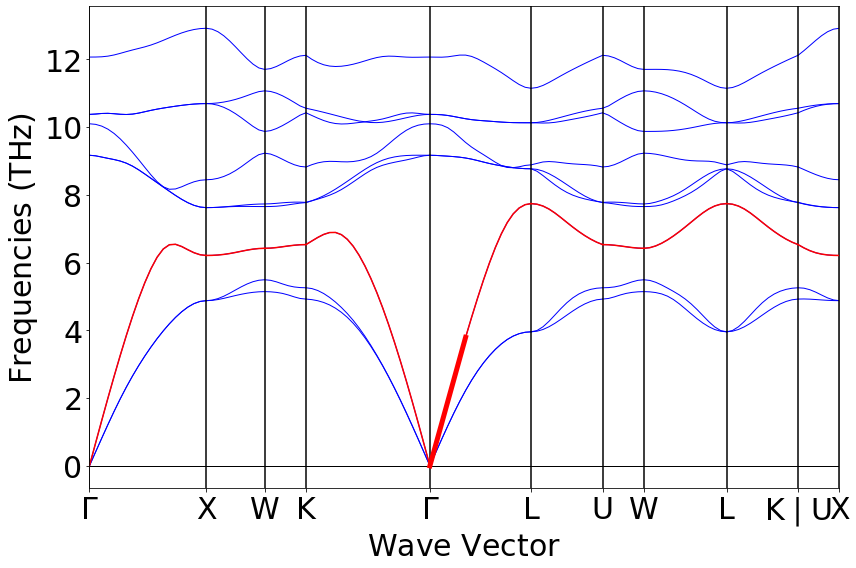

In [6]:
plotter.get_plot()
for i in range(len(dist)):
    
    plt.plot(dist[i], freq[i][2], color = 'red')
    


plt.plot([dist[4][0], dist[4][6]],[freq[4][2][0],freq[4][2][6]], color='red', lw=5)


a = 2*np.pi*np.abs((freq[4][2][1]-freq[4][2][0])*(10**2))/(dist[4][1]-dist[4][0])
print("La vitesse du son dans la direction Γ - L vaut "+str(a) +" m/s.")